In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
def display_image_in_actual_size(im_path):

    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data)

    plt.show()

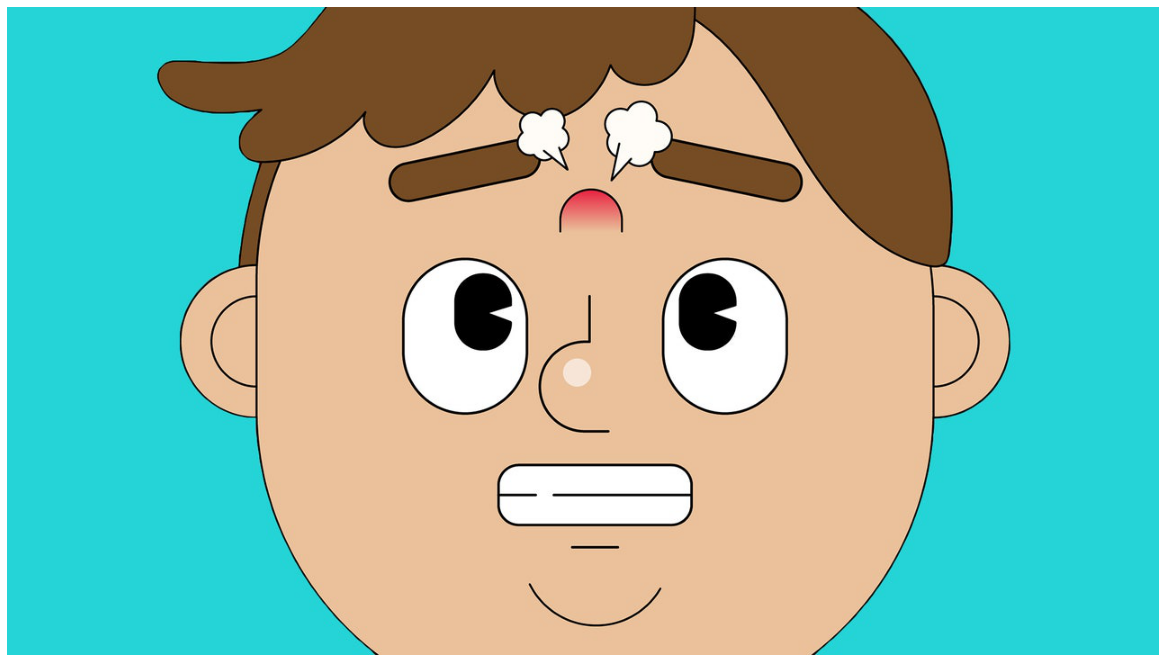

In [8]:
display_image_in_actual_size("./face.jpg")

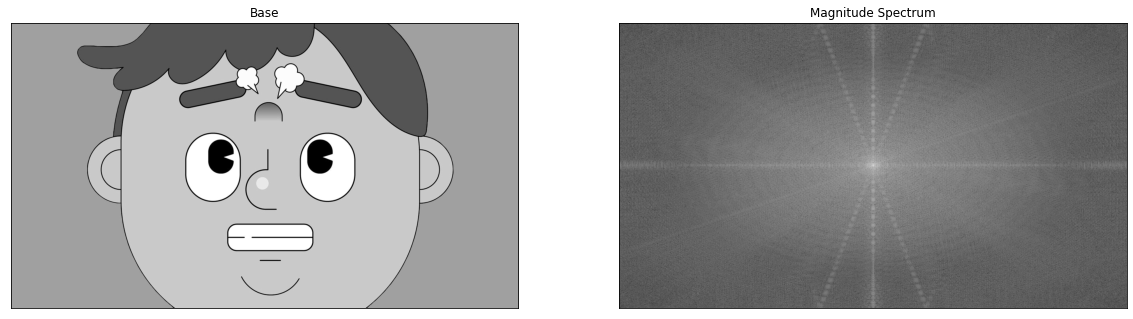

In [15]:
gray_base = cv2.imread('face.jpg', 0)

# fast fourier transform for grayscale base image
f_base = np.fft.fft2(gray_base)

# zero frequency component (DC component) will be at top left corner
# if you want to bring it to center, you need to shift the result by N/2 in both the directions
f_base_shift = np.fft.fftshift(f_base)
magnitude_spectrum = 20 * np.log(np.abs(f_base_shift))

# apply side-by-side plots for kernels
plt.figure(num='Base and Magnitude Spectrum', figsize=(20,10))
plt.subplot(121), plt.imshow(gray_base, cmap = 'gray')
plt.title('Base'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

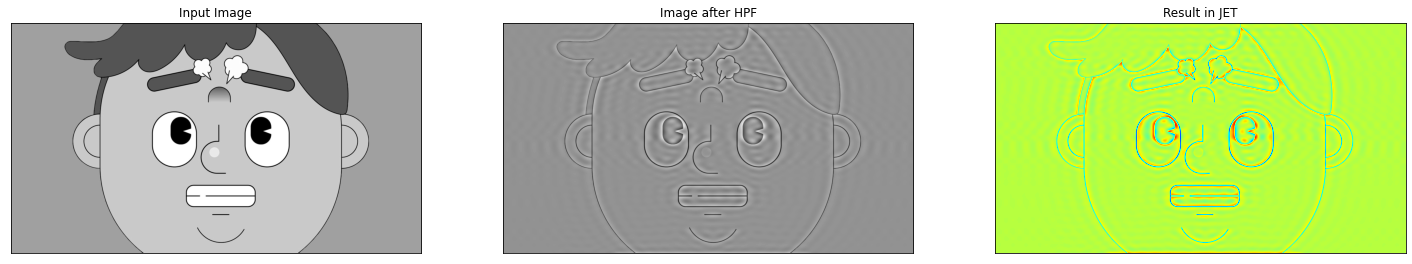

In [23]:
rows, cols = gray_base.shape
crow, ccol = rows//2 , cols//2

# simply remove the low frequencies by masking with a rectangular window of size 60x60
f_base_shift[crow-30:crow+31, ccol-30:ccol+31] = 0

# apply the inverse shift using np.fft.ifftshift()
# so that DC component again come at the top-left corner
f_ishift = np.fft.ifftshift(f_base_shift)

# find inverse FFT using np.ifft2()
img_back = np.fft.ifft2(f_ishift)

# the result will be a complex number, we can take its absolute value
img_back = np.real(img_back)
plt.figure(num='Base and Magnitude Spectrum', figsize=(25,5))
plt.subplot(131),plt.imshow(gray_base, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'jet')
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()